In [ ]:
#Importe de librerias
import random as r
import math
import numpy as np
import matplotlib.pyplot as plt

**Funciones que utilizaremos**

In [ ]:
#Suma todos los elementos de una lista
def sumalista(listaNumeros):
    laSuma = 0
    for i in listaNumeros:
        laSuma = laSuma + i
    return laSuma

In [ ]:
#Elimina los ceros de una lista
def cleanDeck(arr):
  temp = []
  for i in arr:
    if i == 0:
      continue
    else:
      temp.append(i)

  return temp

In [ ]:
#Creación de un arreglo especifico para los puntos 3 y 4 (saca la mitad de las cartas de un deck de manera aleatoria)
def halfDeck(arr):
  arr1 = np.array(arr)
  cont = 0
  narr1 = len(arr1)
  while cont <= (narr1/2)-4:
    index = math.floor(r.random() * narr1)
    if arr1[index] != 0:
      arr1[index] = 0
      cont += 1
  return cleanDeck(arr1)


In [ ]:
#Para puntos 1 y 2 (recibe un deck, el numero de iteraciones y retorna la probabilidad de hacer 21)
def probabilidad21(arr, n):
  deck = np.array(arr)
  hand = []
  casos21 = 0
  casosTotales = 0
  requiredCards = [0,0,0,0,0,0,0,0,0,0]
  #for que se repite el numero de juegos con el que se va a calcular la probabilidad
  for i in range(n):
    while True:
      s = math.floor(r.random() * len(deck)) 
      
      #Revisa que la carta no haya sido sacada antes
      if deck[s] != 0:                             
        hand.append(deck[s])                       
        deck[s] = 0                                

    #Revisa si se tiene 21 en la mano 
      if sumalista(hand) == 21:                    
        casos21 += 1
        casosTotales += 1
        deck = np.array(arr)
        requiredCards[len(hand)-2] += 1/n
        hand = []
        break
    
    #revisa si se tiene menos de 21 en la mano
      elif sumalista(hand) < 21:
        continue
      
      #si se paso de 21 entra en este else
      else:
        casosTotales += 1
        deck = np.array(arr)
        hand = []
        break
  
  #hace el plot de la probabilidad de hacer 21 con cierta cantidad de cartas
  plt.title('required cards to get 21')
  x = [2,3,4,5,6,7,8,9,10,11]
  plt.bar((2,3,4,5,6,7,8,9,10,11),requiredCards,align='center') # A bar chart
  plt.show()
  resultado = casos21/casosTotales
  casos21 = 0
  casosTotales = 0

  return resultado

In [ ]:
#Para puntos 3 y 4 (recibe el deck, la suma que posee en la mano, la cantidad de veces que se va a repetir y un boleano que dice si el deck esta a la mitad)
def probabilidad21Avanzada(arr, handSum, n, divideDeck):
  #revisa si el deck esta por la mitad (en caso de que no lo divide, en otro caso continua)
  if divideDeck:
    deck = halfDeck(arr)
  else:
    deck = np.array(arr)
  print(str(deck))
  hand = []
  casos21 = 0
  casosTotales = 0
  requiredCards = [0,0]

  #for que se repite el numero de veces que se va a jugar para calcular la probabilidad
  for i in range(n):
    while True:
      s = math.floor(r.random() * len(deck))
      
  #revisa si la carta ya fue sacada antes
      if deck[s] != 0:                    
        hand.append(deck[s])                       
        deck[s] = 0               

      sumaHand = sumalista(hand)


#revisa si ya se tiene 21 en la mano
      if sumaHand + handSum == 21:                    
        casos21 += 1
        casosTotales += 1
        #reinicio de deck
        if divideDeck:
          deck = halfDeck(arr)
        else:
          deck = np.array(arr)
        requiredCards[len(hand)-1] += 1/n
        hand = []
        break

#revisa si se tiene menos de 21 en la mano
      elif sumaHand + 19 < 21:
        continue

#else en el que se entra si ya se paso de 21
      else:
        casosTotales += 1
        if divideDeck:
          deck = halfDeck(arr)
        else:
          deck = np.array(arr)
        hand = []
        break
  
#hace el plot de la probabilidad de hacer 21 con cierta cantidad de cartas
  plt.title('required cards to get 21')
  plt.bar((4, 5),requiredCards,align='center') # A bar chart
  plt.show()
  resultado = casos21/casosTotales
  casos21 = 0
  casosTotales = 0

  return resultado

In [ ]:
#Para punto 5
def benBlackJack(coldArr, winHot, winCold, n):
  hotDeck = [1,1,1,1,2,2,2,2,3,3]

  casos21Hot = 0
  casos21Cold = 0
  casosTotalesHot = 0
  casosTotalesCold = 0
  requiredCards = [0,0,0,0,0,0,0,0,0,0]
  hand = []
  hot = False

#for que se repite el numero de veces que se va a jugar para calcular la probabilidad
  for i in range(n):
    #se genera la probabilidad de 1 a 10 de que sea un juego con hot deck
    deckProb = math.floor(r.random() * 10)
    if deckProb == 1:
      hot = True
      deck = np.array(hotDeck)
    else:
      hot = False
      deck = np.array(coldArr)
    
    while True:
      s = math.floor(r.random() * len(deck))
      if deck[s] != 0:
        # print("agregue a la mano la carta: "+ str(deck[s]))                      
        hand.append(deck[s])                       
        deck[s] = 0               

      sumaHand = sumalista(hand)
        # print("la suma de la mano es: " + str(sumalista(hand1)))
     #Caso en el que se juega con Hot Deck uwu
      if hot:
        #revisa si se tiene 21 en la mano
        if sumaHand + 19 == 21:                  
          casos21Hot += 1
          casosTotalesHot += 1
          requiredCards[len(hand)+1] += 1/n
          # print("la carta a agregar a requiredCards es: " + str(len(hand)-1))
          hand = []
          # print("la mano en este momento de 21 es: " + str(hand1))
          break
        #revisa si se tiene menos de 21
        elif sumaHand + 19 < 21:
          continue
        #revisa si ya se paso de 21
        else:
          casosTotalesHot += 1
          hand = []
          break
      #Caso cuando se juega con Cold Deck
      else:
          #revisa si se tiene 21 en la man0
        if sumaHand== 21: 
          casos21Cold += 1
          casosTotalesCold += 1
          requiredCards[len(hand)-2] += 1/n
          # print("la carta a agregar a requiredCards es: " + str(len(hand)-1))
          hand = []
          # print("la mano en este momento de 21 es: " + str(hand1))
          break
        #revisa si se tiene menos de 21 en la mano
        elif sumaHand < 21:
          continue
        #else para cuando ya se paso de 21
        else:
          casosTotalesCold += 1
          hand = []
          break

#hace el plot de la probabilidad de hacer 21 con cierta cantidad de cartas
  plt.title('required cards to get 21')
  plt.bar((2,3,4,5,6,7,8,9,10,11),requiredCards,align='center') # A bar chart
  plt.show()
  print("Dinero ganado en casos hot: " + str(casos21Hot *winHot))
  print("Dinero ganado en casos cold: " + str(casos21Cold*winCold))
  print("Dinero perdido en casos hot: " + str((casosTotalesHot - casos21Hot)*winHot))
  print("Dinero perdido en casos cold: " + str((casosTotalesCold-casos21Cold)*winCold))
  resultado = (casos21Hot * winHot + casos21Cold * winCold) - ((casosTotalesHot - casos21Hot) * winHot  + ((casosTotalesCold-casos21Cold) * winCold))

  return resultado

**PUNTO 1**

In [ ]:
arr48 = [1,2,3,4,5,6,7,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]

Probabilidad de victoria con un deck espanol: 



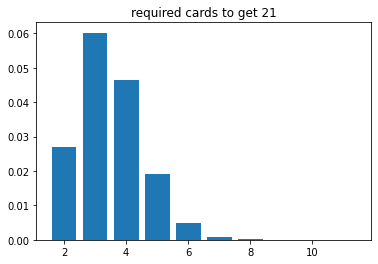

El resultado es de:  0.1585048


In [ ]:
print("Probabilidad de victoria con un deck espanol: \n")
print("El resultado es de: ", probabilidad21(arr48, 10000000))

In [ ]:
arr52 = [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13]

Probabilidad de victoria con un deck de poker: 



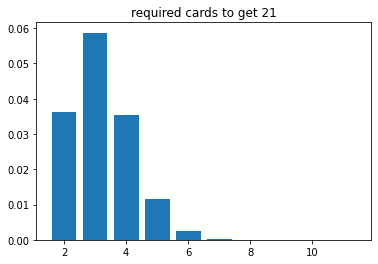

El resultado es de:  0.1447334


In [ ]:
print("Probabilidad de victoria con un deck de poker: \n")
print("El resultado es de: ", probabilidad21(arr52, 10000000))

**Punto 2**

In [ ]:
arr48mod = [1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10] 

Probabilidad de victoria con un deck espanol con rey, sota y caballo valiendo 10: 



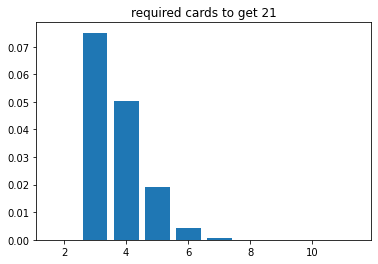

El resultado es de:  0.1495396


In [ ]:
print("Probabilidad de victoria con un deck espanol con rey, sota y caballo valiendo 10: \n")
print("El resultado es de: ", probabilidad21(arr48mod, 10000000))

In [ ]:
arr52poker = [1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]

Probabilidad de victoria con un deck poker con J,Q y K valiendo 10l: 



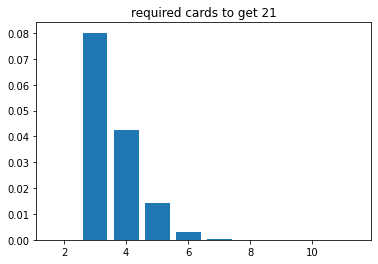

El resultado es de:  0.1402358


In [ ]:
print("Probabilidad de victoria con un deck poker con J,Q y K valiendo 10l: \n")
print("El resultado es de: ", probabilidad21(arr52poker, 10000000))

**Punto 3**

In [ ]:
arr48Modified = [1,2,3,4,5,6,0,10,11,12,1,2,3,4,5,6,0,8,9,10,11,12,1,2,3,4,0,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]

Probabilidad de victoria con un deck espanol con 7, 7, 5 en la mano y con el deck a la mitad aleatoriamente: 

[2, 3, 4, 6, 12, 1, 6, 8, 10, 11, 2, 3, 4, 7, 9, 10, 11, 12, 1, 2, 6, 9, 10]


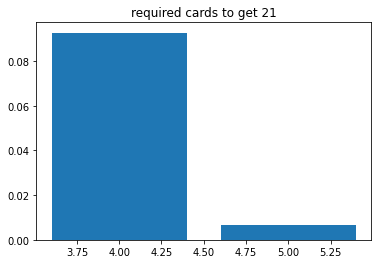

El resultado es de:  0.0994163


In [ ]:
print("Probabilidad de victoria con un deck espanol con 7, 7, 5 en la mano y con el deck a la mitad aleatoriamente: \n")
print("El resultado es de: ", probabilidad21Avanzada(arr48Modified, 19, 10000000, True))

In [ ]:
arr52Modified = [1,2,3,4,5,6,0,8,9,10,10,10,10,1,2,3,4,5,6,0,8,9,10,10,10,10,1,2,3,4,0,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]

Probabilidad de victoria con un deck de poker con 7, 7, 5 en la mano y con el deck a la mitad aleatoriamente: 

[5, 6, 8, 10, 1, 9, 10, 10, 10, 1, 3, 7, 9, 10, 10, 10, 1, 2, 5, 6, 8, 9, 10, 10, 10, 10]


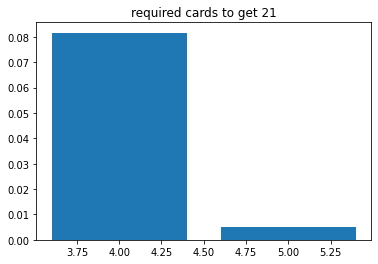

El resultado es de:  0.0866947


In [ ]:
print("Probabilidad de victoria con un deck de poker con 7, 7, 5 en la mano y con el deck a la mitad aleatoriamente: \n")
print("El resultado es de: ", probabilidad21Avanzada(arr52Modified, 19, 10000000, True))

# Punto 4


Probabilidad Analitica de un hot deck con 12 cartas es 4/12 + (4/12 * 3/11) = 42% aproximadamente

Probabilidad Analitica de un hot deck con 10 cartas es 4/10 + (4/10 * 3/9) = 53% aproximadamente

Probabilidad Analitica de un cold deck con 12 cartas es (4/12 * 3/11) = 1.5% aproximadamente

Probabilidad Analitica de un cold deck con 10 cartas es (4/10 * 3/9) = 2.2% aproximadamente

In [ ]:
#declaraciones de decks a usar en el punto 4
hotDeck48_12 = [1,1,1,1,2,2,2,2,3,3,4,11]
hotDeck48_10 = [1,2,1,2,1,2,1,2,10,4]
coldDeck48_12 = [1,1,12,4,7,7,9,8,3,3,4,11]
coldDeck48_10 = [1,1,12,4,7,7,9,8,3,3]
hotDeck52_12 = [1,1,1,1,2,2,2,2,10,6,9,4]
hotDeck52_10 = [1,1,1,1,2,2,2,2,6,9]
coldDeck52_12 = [1,1,10,6,9,4,6,8,4,3,5,7]
coldDeck52_10 = [1,1,10,6,9,4,6,8,4,3]

Probabilidad de victoria con un Hot deck espanol de 12 cartas: 

[ 1  1  1  1  2  2  2  2  3  3  4 11]


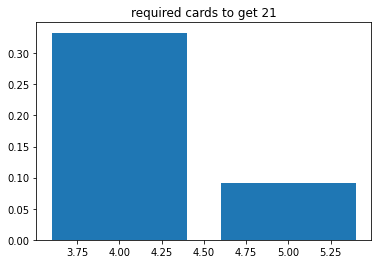

El resultado es de:  0.4239701


In [ ]:
print("Probabilidad de victoria con un Hot deck espanol de 12 cartas: \n")
print("El resultado es de: ", probabilidad21Avanzada(hotDeck48_12, 19, 10000000, False))

Probabilidad de victoria con un Hot deck espanol de 10 cartas: 

[ 1  2  1  2  1  2  1  2 10  4]


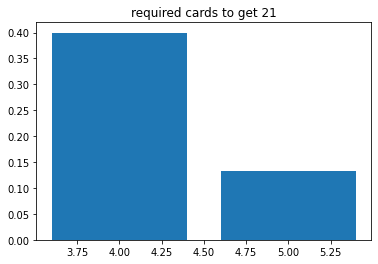

El resultado es de:  0.5329759


In [ ]:
print("Probabilidad de victoria con un Hot deck espanol de 10 cartas: \n")
print("El resultado es de: ", probabilidad21Avanzada(hotDeck48_10, 19, 10000000, False))

Probabilidad de victoria con un Cold deck espanol de 12 cartas: 

[ 1  1 12  4  7  7  9  8  3  3  4 11]


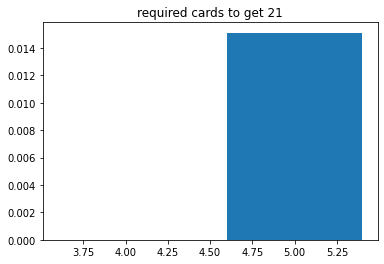

El resultado es de:  0.0151091


In [ ]:
print("Probabilidad de victoria con un Cold deck espanol de 12 cartas: \n")
print("El resultado es de: ", probabilidad21Avanzada(coldDeck48_12, 19, 10000000, False))

Probabilidad de victoria con un Cold deck espanol de 12 cartas: 

[ 1  1 12  4  7  7  9  8  3  3]


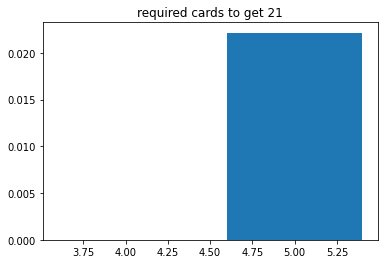

El resultado es de:  0.0221454


In [ ]:
print("Probabilidad de victoria con un Cold deck espanol de 12 cartas: \n")
print("El resultado es de: ", probabilidad21Avanzada(coldDeck48_10, 19, 10000000, False))

Probabilidad de victoria con un Hot deck de poker de 12 cartas: 

[ 1  1  1  1  2  2  2  2 10  6  9  4]


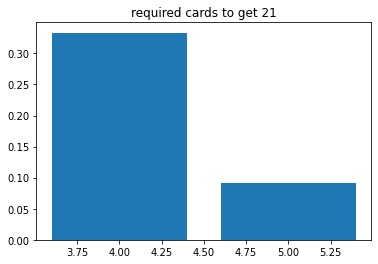

El resultado es de:  0.4243257


In [ ]:
print("Probabilidad de victoria con un Hot deck de poker de 12 cartas: \n")
print("El resultado es de: ", probabilidad21Avanzada(hotDeck52_12, 19, 10000000, False))

Probabilidad de victoria con un Hot deck de poker de 10 cartas: 

[1 1 1 1 2 2 2 2 6 9]


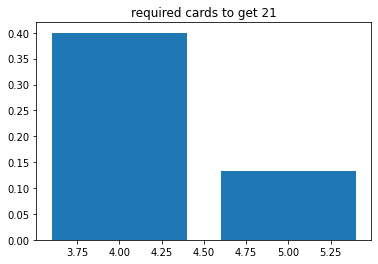

El resultado es de:  0.533187


In [ ]:
print("Probabilidad de victoria con un Hot deck de poker de 10 cartas: \n")
print("El resultado es de: ", probabilidad21Avanzada(hotDeck52_10, 19, 10000000, False))

Probabilidad de victoria con un Cold deck de poker de 12 cartas: 

[ 1  1 10  6  9  4  6  8  4  3  5  7]


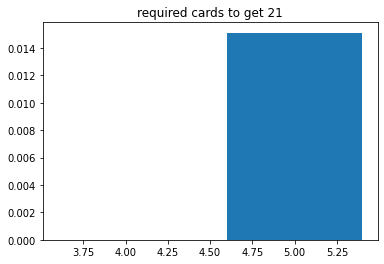

El resultado es de:  0.0151195


In [ ]:
print("Probabilidad de victoria con un Cold deck de poker de 12 cartas: \n")
print("El resultado es de: ", probabilidad21Avanzada(coldDeck52_12, 19, 10000000, False))

Probabilidad de victoria con un Cold deck de poker de 10 cartas: 

[ 1  1 10  6  9  4  6  8  4  3]


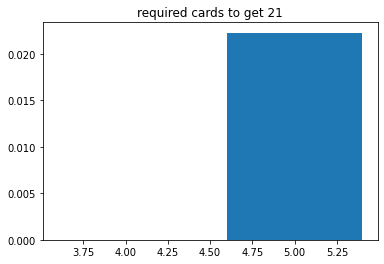

El resultado es de:  0.0222686


In [ ]:
print("Probabilidad de victoria con un Cold deck de poker de 10 cartas: \n")
print("El resultado es de: ", probabilidad21Avanzada(coldDeck52_10, 19, 10000000, False))

# Punto 5

Ben juega 3 días a la semana, y juega 10 horas cada día.
Cada juego de Blackjack dura 3 minutos, por lo tanto:

10 * 3 * 60 = 1800 minutos

1800 / 3 = 600 juegos totales.



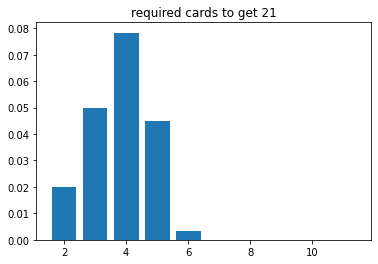

Dinero ganado en casos hot: 30000
Dinero ganado en casos cold: 880
Dinero perdido en casos hot: 25000
Dinero perdido en casos cold: 4570
Dinero esperado en un fin de semana con el mazo espanol: 1310


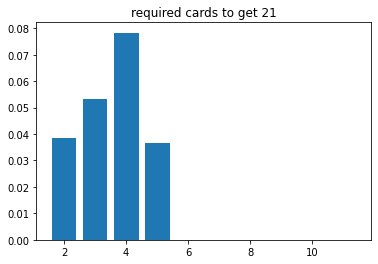

Dinero ganado en casos hot: 31000
Dinero ganado en casos cold: 930
Dinero perdido en casos hot: 25000
Dinero perdido en casos cold: 4510
Dinero esperado en un fin de semana con el mazo de poker: 2420


In [ ]:
value1 = benBlackJack(arr48, 1000, 10, 600)
print("Dinero esperado en un fin de semana con el mazo espanol: " + str(value1))
value2 = benBlackJack(arr52, 1000, 10, 600)
print("Dinero esperado en un fin de semana con el mazo de poker: " + str(value2))

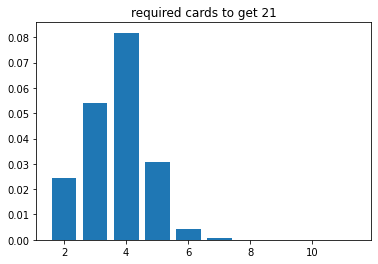

Dinero ganado en casos hot: 320205000
Dinero ganado en casos cold: 8566310
Dinero perdido en casos hot: 280831000
Dinero perdido en casos cold: 45423330
Dinero esperado en un fin de semana con el mazo espanol: 251.698


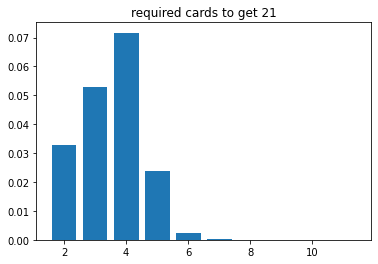

Dinero ganado en casos hot: 319614000
Dinero ganado en casos cold: 7811870
Dinero perdido en casos hot: 280539000
Dinero perdido en casos cold: 46186600
Dinero esperado en un fin de semana con el mazo de poker: 70.027


In [ ]:
value1 = benBlackJack(arr48, 1000, 10, 600*10000)/10000
print("Dinero esperado en un fin de semana con el mazo espanol: " + str(value1))
value2 = benBlackJack(arr52, 1000, 10, 600*10000)/10000
print("Dinero esperado en un fin de semana con el mazo de poker: " + str(value2))

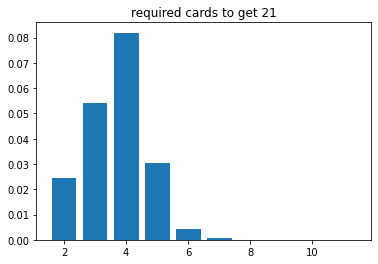

Dinero ganado en casos hot: 31997260000
Dinero ganado en casos cold: 856798910
Dinero perdido en casos hot: 27993967000
Dinero perdido en casos cold: 4543288820
Dinero esperado en un fin de semana con el mazo espanol: 316.80309


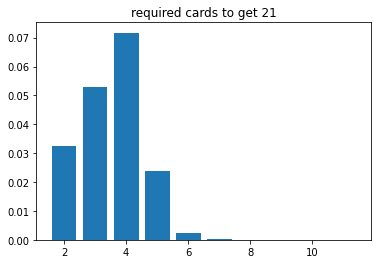

Dinero ganado en casos hot: 32003557000
Dinero ganado en casos cold: 781486260
Dinero perdido en casos hot: 28004461000
Dinero perdido en casos cold: 4618433560
Dinero esperado en un fin de semana con el mazo de poker: 162.1487


In [ ]:
value1 = benBlackJack(arr48, 1000, 10, 600*1000000)/1000000
print("Dinero esperado en un fin de semana con el mazo espanol: " + str(value1))

value2 = benBlackJack(arr52, 1000, 10, 600*1000000)/1000000
print("Dinero esperado en un fin de semana con el mazo de poker: " + str(value2))